# Worked-out example for gradient descent

Computing regression parameters (gradient descent example)


## The data

Consider the following 5 point synthetic data set:



In [1]:
import numpy as np

In [2]:
X = np.array([0, 1, 2, 3, 4])
Y =  np.array([1, 3, 7, 13, 21])

Which is plotted below:



In [3]:
import imp
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

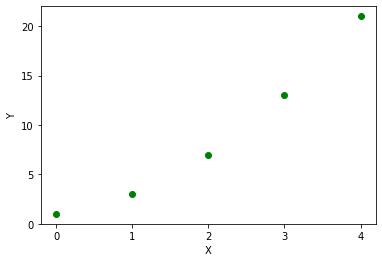

In [4]:
plt.plot(X, Y, 'go')

plt.xlabel('X')
plt.ylabel('Y')

ax=plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(5))

plt.show()

## What we need


Now that we’ve computed the regression line using a closed form solution let’s do it again but with gradient descent. 

Recall that:

The derivative of the cost for the intercept is the sum of the errors

The derivative of the cost for the slope is the sum of the product of the errors and the input

We will need a starting value for the slope and intercept, a step_size and a tolerance

* initial_intercept = 0

* initial_slope = 0

* step_size = 0.05

* tolerance = 0.01

## The algorithm


In each step of the gradient descent we will do the following:

1. Compute the predicted values given the current slope and intercept

2. Compute the prediction errors (prediction - Y)

3. Update the intercept:

    * compute the derivative: sum(errors)

    * compute the adjustment as step_size times the derivative

    * decrease the intercept by the adjustment

4. Update the slope:

    * compute the derivative: sum(errors*input)

    * compute the adjustment as step_size times the derivative

    * decrease the slope by the adjustment

5. Compute the magnitude of the gradient

6. Check for convergence

## The algorithm in action 


**First step:**

Intercept = 0 

Slope = 0

1. predictions = [0, 0, 0, 0, 0] 

2. errors = [-1, -3, -7, -13, -21]

3. update Intercept

    sum([-1, -3, -7, -13, -21])  = -45

    adjustment = 0.05 * -45 = -2.25

    new_intercept = 0 - -2.25 = 2.25

4. update Slope

    sum([0, 1, 2, 3, 4] * [-1, -3, -7, -13, -21])  = -140

    adjustment = 0.05 * -140 = -7

    new_slope = 0 - -7 = 7

5. magnitude = sqrt(( -45)^2 + (-140)^2) = 147.05

6. magnitude > tolerance: not converged

**Second step:**

Intercept = 2.25

Slope = 7

1. predictions = [2.25, 9.25, 16.25, 23.25, 30.25] 

2. errors = [1.25, 6.35, 9.25, 10.25, 9.25]

3. update Intercept

    sum([1.25, 6.35, 9.25, 10.25, 9.25])  = 36.25

    adjustment = 0.05 * 36.25 = 1.8125

    new_intercept = 2.25-1.8125 = 0.4375

4. update Slope

    sum([0, 1, 2, 3, 4] * [1.25, 6.35, 9.25, 10.25, 9.25])  = 92.5

    adjustment = 0.05 * 92.5 = 4.625

    new_slope =  7 - 4.625 = 2.375

5. magnitude = sqrt((36.25)^2 + (92.5)^2) = 99.35

6. magnitude > tolerance: not converged

**Third step:**

Intercept =  0.4375

Slope = 2.375

1. predictions = [0.4375, 2.8125, 5.1875, 7.5625, 9.9375]

2. errors = [-0.5625,  -0.1875,  -1.8125,  -5.4375, -11.0625]

3. update Intercept

    sum([-0.5625,  -0.1875,  -1.8125,  -5.4375, -11.0625])  = -19.0625

    adjustment = 0.05 * -19.0625 = -0.953125

    new_intercept = 0.4375 - -0.953125 = 1.390625

4. update Slope

    sum( [0, 1, 2, 3, 4] * [-0.5625,  -0.1875,  -1.8125,  -5.4375, -11.0625])  = -64.375

    adjustment = 0.05 * -64.375= -3.21875

    new_slope = 2.375 --3.21875 = 5.59375

5. magnitude = sqrt(( -19.0625)^2 + (-64.375)^2) = 67.13806

6. magnitude > tolerance: not converged

Let’s skip forward a few steps… after the 77th step we have gradient magnitude 0.0107.

**78th Step:**

Intercept = -0.9937

Slope =  4.9978

1. predictions = [-0.99374,  4.00406,  9.00187, 13.99967, 18.99748]

2. errors = [-1.99374,  1.00406,  2.00187,  0.99967, -2.00252]

3. update Intercept

    sum([-1.99374,  1.00406,  2.00187,  0.99967, -2.00252])  = 0.009341224

    adjustment = 0.05 * 0.009341224 = 0.0004670612

    new_intercept = -0.9937 - 0.0004670612 = -0.994207

4. update Slope

    sum([0, 1, 2, 3, 4] * [-1.99374,  1.00406,  2.00187,  0.99967, -2.00252])  = -0.0032767

    adjustment = 0.05 *-0.0032767 = -0.00016383

    new_slope = 4.9978 --0.00016383 = 4.9979

5. magnitude = sqrt[()^2 + ()^2] = 0.0098992

6. magnitude < tolerance: converged!

**Final slope: 4.998**

**Final Intercept: -0.994**

If you continue you will get to (-1, 5) but at this point the change in RSS (our cost) is negligible. 



## Visualizing the steps:


After the first step we have this line:



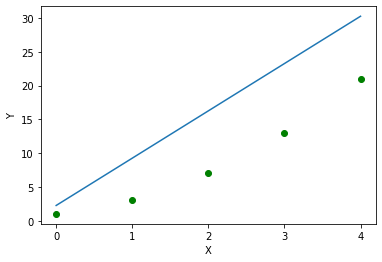

In [5]:
# X = np.array([0, 1, 2, 3, 4])
# Y =  np.array([1, 3, 7, 13, 21])

Y2 = 7 * X + 2.25

plt.plot(X, Y, 'go')
plt.plot(X, Y2)

plt.xlabel('X')
plt.ylabel('Y')

ax=plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(5))

plt.show()

After the second step we have this line:



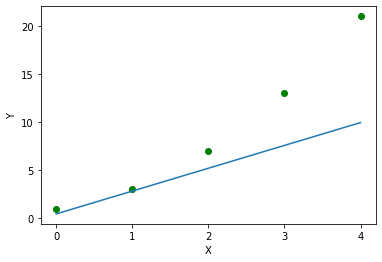

In [6]:
# X = np.array([0, 1, 2, 3, 4])
# Y =  np.array([1, 3, 7, 13, 21])

Y3 = 2.375 * X + 0.4375

plt.plot(X, Y, 'go')
plt.plot(X, Y3)

plt.xlabel('X')
plt.ylabel('Y')

ax=plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(5))

plt.show()

After the third step we have this line:



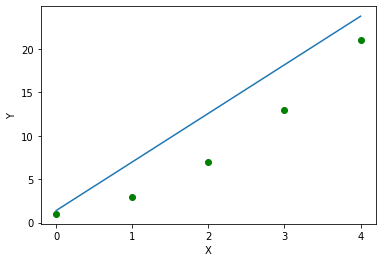

In [7]:
# X = np.array([0, 1, 2, 3, 4])
# Y =  np.array([1, 3, 7, 13, 21])

Y4 = 5.59375 * X + 1.390625

plt.plot(X, Y, 'go')
plt.plot(X, Y4)

plt.xlabel('X')
plt.ylabel('Y')

ax=plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(5))

plt.show()

And after the final step we have this line:



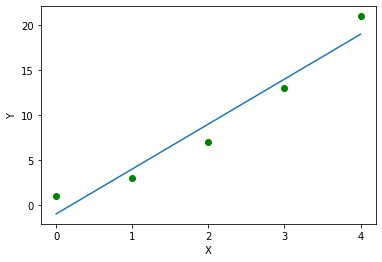

In [8]:
# X = np.array([0, 1, 2, 3, 4])
# Y =  np.array([1, 3, 7, 13, 21])

Y79 = 4.998 * X + (-0.994)

plt.plot(X, Y, 'go')
plt.plot(X, Y79)

plt.xlabel('X')
plt.ylabel('Y')

ax=plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(5))

plt.show()